In [19]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf



**Fetch the data**

In [20]:

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip -P data

--2020-10-26 16:41:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘data/AirQualityUCI.zip.1’

AirQualityUCI.zip.1 100%[===================>]   1.47M  7.76MB/s    in 0.2s    

2020-10-26 16:41:29 (7.76 MB/s) - ‘data/AirQualityUCI.zip.1’ saved [1543989/1543989]



**Unzip and extract the file**

In [21]:

import zipfile
with zipfile.ZipFile('/content/data/AirQualityUCI.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/data')

**Read the Data**

In [22]:

air = pd.read_excel("/content/data/AirQualityUCI.xlsx")

**Check for null values**

In [23]:
air.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

**Look at the first few values of data**

In [24]:
air.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


**Create a column of Date timr that combines date and time**

In [25]:
air["Date Time"] = air["Date"].astype(str) + ' ' +air["Time"].astype(str)

**slice [start:stop:step], starting from index 5 take every 6th record.**

In [26]:
air = air[5::6]
date_time = pd.to_datetime(air.pop('Date Time'), format='%Y-%m-%d %H:%M:%S')


In [27]:
air.pop("Date")

5      2004-03-10
11     2004-03-11
17     2004-03-11
23     2004-03-11
29     2004-03-11
          ...    
9329   2005-04-03
9335   2005-04-03
9341   2005-04-03
9347   2005-04-04
9353   2005-04-04
Name: Date, Length: 1559, dtype: datetime64[ns]

In [28]:
air.pop("Time")

5       23:00:00
11      05:00:00
17      11:00:00
23      17:00:00
29      23:00:00
          ...   
9329    11:00:00
9335    17:00:00
9341    23:00:00
9347    05:00:00
9353    11:00:00
Name: Time, Length: 1559, dtype: object

In [29]:
air.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
5,1.2,1197.00,38,4.741012,750.25,89.0,1336.5,96.0,1393.00,949.25,11.175,59.175000,0.784772
11,0.7,1066.00,8,1.133431,512.00,16.0,1918.0,28.0,1182.00,421.75,11.000,56.175000,0.736560
17,1.5,1178.75,43,4.971584,762.00,95.0,1327.5,92.0,1361.75,670.50,10.500,57.925000,0.735161
23,2.9,1383.00,150,11.151581,1019.75,243.0,1008.0,135.0,1718.75,1104.00,9.775,67.624998,0.818501
29,1.0,912.75,26,2.645722,629.25,47.0,1564.5,53.0,1252.25,551.75,8.250,60.824999,0.665744


In [31]:
#Replace the negative value by 0
air.replace(-200, 0, inplace=True)
air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000
mean,1.610455,1033.786348,17.128929,8.724172,866.826866,193.464464,829.406243,93.243169,1362.306446,945.972685,17.874123,46.558130,0.982354
std,1.394299,292.392779,73.209448,6.852530,304.559125,208.184137,307.494054,58.960947,423.831466,419.244324,9.570988,19.837927,0.442972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.275000,0.000000,0.000000
25%,0.550000,906.000000,0.000000,3.544659,684.875000,55.000000,666.000000,53.000000,1157.250000,677.625000,11.050000,32.125000,0.689122
50%,1.400000,1033.000000,0.000000,7.252462,867.750000,133.100000,818.250000,95.000000,1420.000000,907.750000,17.450000,47.750000,0.973757
75%,2.400000,1191.375000,0.000000,12.338012,1061.250000,251.400000,991.250000,130.000000,1631.250000,1201.500000,24.562500,61.875000,1.296532
max,8.400000,1914.500000,832.000000,46.277657,1897.000000,1290.000000,2559.250000,332.600000,2640.750000,2493.500000,43.424999,87.174999,2.119450


**Replace the negative values in the column with 0**

In [33]:
air["T"] = air["T"].apply(lambda x : x if x>=0 else 0)
air.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000,1559.000000
mean,1.610455,1033.786348,17.128929,8.724172,866.826866,193.464464,829.406243,93.243169,1362.306446,945.972685,17.875102,46.558130,0.982354
std,1.394299,292.392779,73.209448,6.852530,304.559125,208.184137,307.494054,58.960947,423.831466,419.244324,9.569103,19.837927,0.442972
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.550000,906.000000,0.000000,3.544659,684.875000,55.000000,666.000000,53.000000,1157.250000,677.625000,11.050000,32.125000,0.689122
50%,1.400000,1033.000000,0.000000,7.252462,867.750000,133.100000,818.250000,95.000000,1420.000000,907.750000,17.450000,47.750000,0.973757
75%,2.400000,1191.375000,0.000000,12.338012,1061.250000,251.400000,991.250000,130.000000,1631.250000,1201.500000,24.562500,61.875000,1.296532
max,8.400000,1914.500000,832.000000,46.277657,1897.000000,1290.000000,2559.250000,332.600000,2640.750000,2493.500000,43.424999,87.174999,2.119450


In [34]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

In [36]:
day = 24*60*60
year = (365.2425)*day


In [38]:
air['Day (sin)'] = np.sin(timestamp_s * (2 * np.pi / day))
air['Day (cos)'] = np.cos(timestamp_s * (2 * np.pi / day))
air['Year (sin)'] = np.sin(timestamp_s * (2 * np.pi / year))
air['Year (cos)'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Signal for the Time of day')

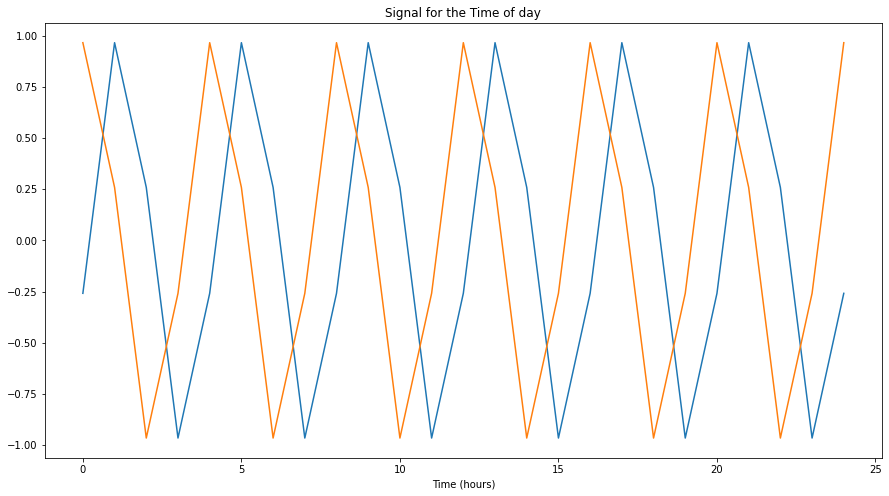

In [56]:
plt.figure(figsize=(15,8))
plt.plot(np.array(air['Day (sin)'])[:25])
plt.plot(np.array(air['Day (cos)'])[:25])
plt.xlabel('Time (hours)')
plt.title('Signal for the Time of day')

In [47]:
column_indices = {name: i for i, name in enumerate(air.columns)}

In [48]:
n = len(air)
train_df = air[0:int(n*0.7)]
val_df = air[int(n*0.7):int(n*0.9)]
test_df = air[int(n*0.9):]

num_features = air.shape[1]

In [49]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

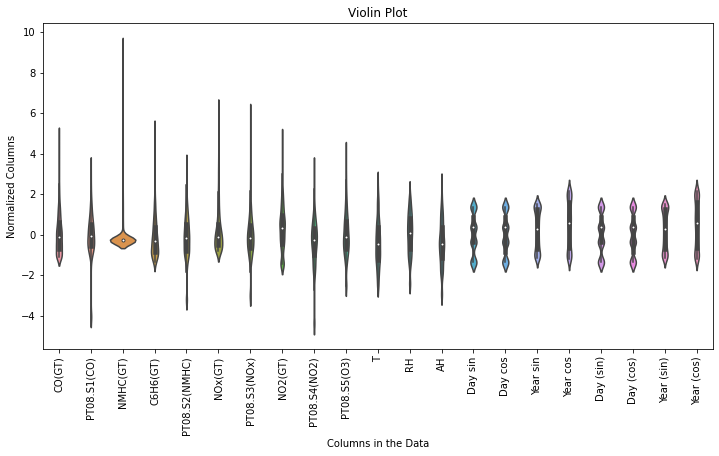

In [57]:
df_std = (air - train_mean) / train_std
df_std = df_std.melt(var_name='Columns in the Data', value_name='Normalized Columns')
plt.figure(figsize=(12, 6))
plt.title('Violin Plot')
ax = sns.violinplot(x='Columns in the Data', y='Normalized Columns', data=df_std)
_ = ax.set_xticklabels(air.keys(), rotation=90)

In [58]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [59]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['AH'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['AH']

In [60]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['AH'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['AH']

In [61]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window


In [62]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 7, 21)
Inputs shape: (3, 6, 21)
labels shape: (3, 1, 1)


In [63]:
w2.example = example_inputs, example_labels

In [64]:
def plot(self, model=None, plot_col='AH', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

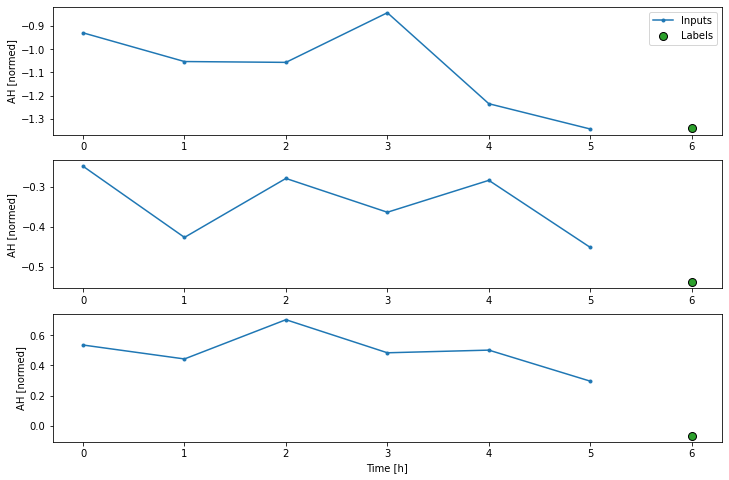

In [65]:
w2.plot()

In [66]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [67]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [68]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 21)
Labels shape (batch, time, features): (32, 1, 1)


In [69]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['AH'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['AH']

In [70]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 21)
Labels shape (batch, time, features): (32, 1, 1)


In [71]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [72]:
baseline = Baseline(label_index=column_indices['AH'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

10/10 [==============================] - 0s 3ms/step - loss: 0.1522 - mean_absolute_error: 0.1946


In [73]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['AH'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['AH']

In [75]:
print(' The Input shape is ', single_step_window.example[0].shape)


 The Input shape is  (32, 1, 21)


In [76]:
print('The Output shape is:', baseline(single_step_window.example[0]).shape)

The Output shape is: (32, 1, 1)


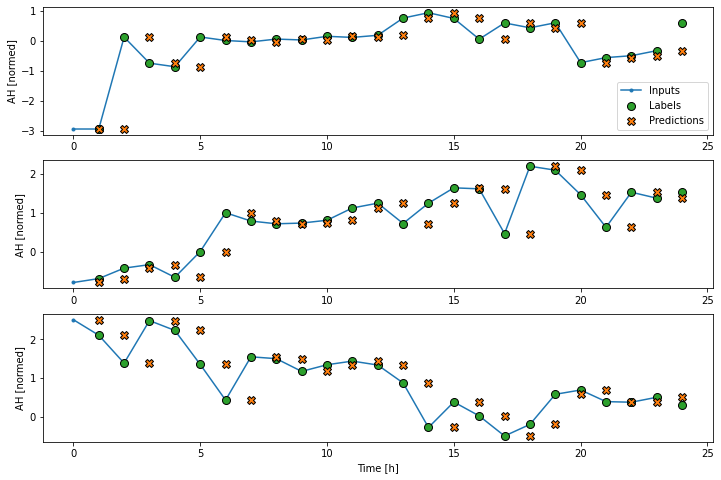

In [77]:
wide_window.plot(baseline)

**Build a keras model**

In [81]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=125),
    tf.keras.layers.Dense(units=50),
    tf.keras.layers.Dense(units=1)])

In [82]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)


Input shape: (32, 1, 21)
Output shape: (32, 1, 1)


In [86]:
MAX_EPOCHS = 100

def compile_and_fit(model, window, patience=15):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [87]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
35/35 [==============================] - 0s 9ms/step - loss: 0.2583 - mean_absolute_error: 0.3248 - val_loss: 0.1794 - val_mean_absolute_error: 0.2851
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 0.2708 - mean_absolute_error: 0.3392 - val_loss: 0.2027 - val_mean_absolute_error: 0.3236
Epoch 3/100
35/35 [==============================] - 0s 6ms/step - loss: 0.2301 - mean_absolute_error: 0.3071 - val_loss: 0.1747 - val_mean_absolute_error: 0.2737
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.2471 - mean_absolute_error: 0.3139 - val_loss: 0.1829 - val_mean_absolute_error: 0.2805
Epoch 5/100
35/35 [==============================] - 0s 6ms/step - loss: 0.2460 - mean_absolute_error: 0.3105 - val_loss: 0.1564 - val_mean_absolute_error: 0.2302
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 0.2360 - mean_absolute_error: 0.3124 - val_loss: 0.1705 - val_mean_absolute_error: 0.2646
Epoch 7/100
35/35 [===

In [88]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 21)
Output shape: (32, 24, 1)


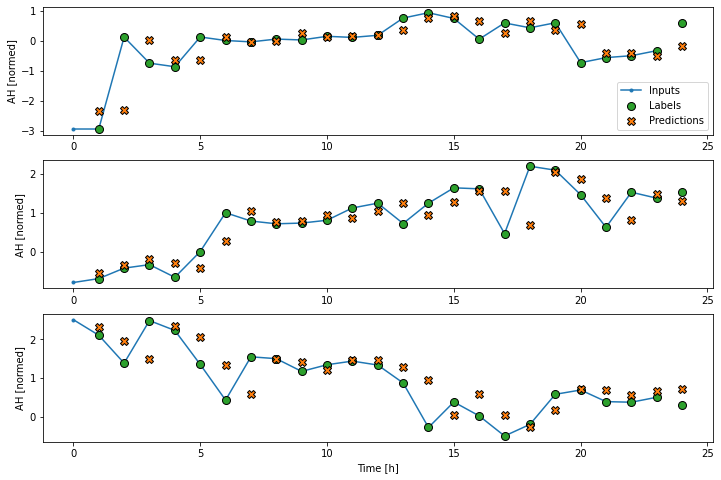

In [89]:
wide_window.plot(linear)

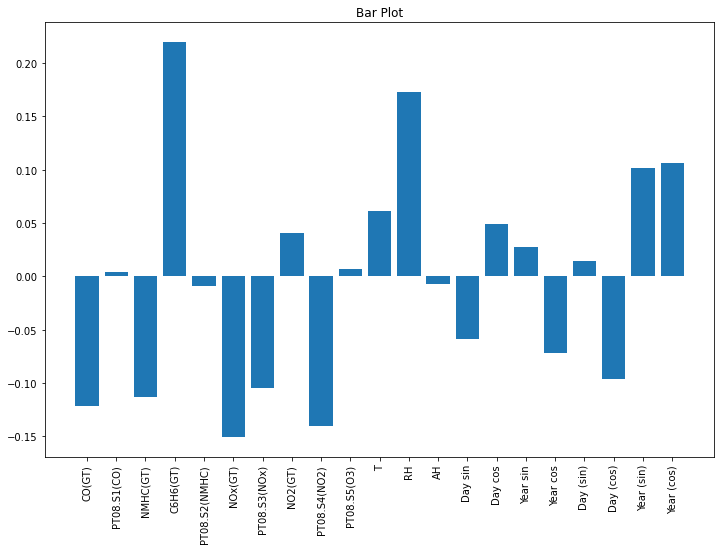

In [94]:
plt.figure(figsize=(12,8))
plt.title('Bar Plot')
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())

axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)


In [99]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=120, activation='relu'),
    tf.keras.layers.Dense(units=360, activation='relu'),
    tf.keras.layers.Dense(units=450, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/100
35/35 [==============================] - 0s 13ms/step - loss: 0.4142 - mean_absolute_error: 0.4545 - val_loss: 0.1742 - val_mean_absolute_error: 0.2916
Epoch 2/100
35/35 [==============================] - 0s 8ms/step - loss: 0.2488 - mean_absolute_error: 0.3293 - val_loss: 0.1693 - val_mean_absolute_error: 0.2294
Epoch 3/100
35/35 [==============================] - 0s 8ms/step - loss: 0.2010 - mean_absolute_error: 0.2844 - val_loss: 0.1400 - val_mean_absolute_error: 0.2286
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 0.2171 - mean_absolute_error: 0.3011 - val_loss: 0.1448 - val_mean_absolute_error: 0.2395
Epoch 5/100
35/35 [==============================] - 0s 9ms/step - loss: 0.2036 - mean_absolute_error: 0.2898 - val_loss: 0.1396 - val_mean_absolute_error: 0.2292
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 0.1826 - mean_absolute_error: 0.2724 - val_loss: 0.2018 - val_mean_absolute_error: 0.3178
Epoch 7/100
35/35 [==

<Figure size 864x576 with 0 Axes>

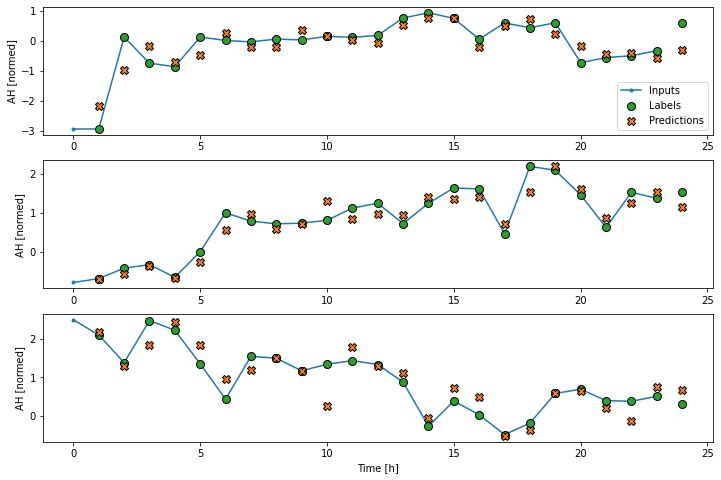

In [97]:
plt.figure(figsize=(12,8))
wide_window.plot(dense)

The lowest validation mean absolute error was found to around 0.22 by using Dense Layers and ReLu Activation Function